In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
%matplotlib inline


In [2]:
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [3]:
print(nba.columns.values)

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


In [4]:
len(nba)

481

In [5]:
#on supprime les colonnes avec des données manquantes
nba2=nba.dropna()

In [6]:
len(nba2)

403

In [7]:
selected_player = nba2[nba2["player"] == "Tony Parker"].iloc[0]

In [8]:
selected_player

player          Tony Parker
pos                      PG
age                      31
bref_team_id            SAS
g                        68
gs                       68
mp                     1997
fg                      456
fga                     914
fg.                   0.499
x3p                      25
x3pa                     67
x3p.               0.373134
x2p                     431
x2pa                    847
x2p.               0.508855
efg.                  0.513
ft                      197
fta                     243
ft.                   0.811
orb                      17
drb                     138
trb                     155
ast                     388
stl                      36
blk                       9
tov                     151
pf                       86
pts                    1134
season            2013-2014
season_end             2013
Name: 344, dtype: object

In [9]:
import random, math
from numpy.random import permutation

indices_aleatoires = permutation(nba2.index)

test = nba2.loc[indices_aleatoires[1:40]]
train = nba2.loc[indices_aleatoires[40:]]

In [10]:
x_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']
y_column = ["pts"]

In [11]:
#on crée le modèle
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=8)
#on ajuste le modèle
knn.fit(train[x_columns], train[y_column])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='uniform')

In [12]:
#on prédit l'échantillon test
predictions = knn.predict(test[x_columns])

In [13]:
#on ajoute une colonne à test
test["predictions"]=predictions

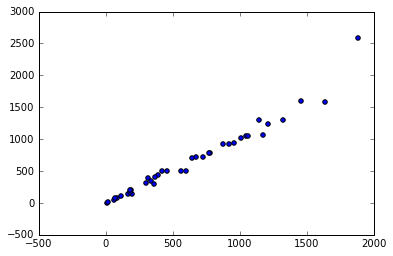

In [14]:
#on représente pts / pred(pts)
plt.scatter(test["predictions"],test["pts"])

In [15]:
# On peut calculer l'indice MSE
mse = (((predictions - test[y_column]) ** 2).sum()) / len(predictions)
mse

pts    15545.836538
dtype: float64

In [16]:
#on travaille sur les iris (uniquement les deux premières colonnes)
iris = datasets.load_iris()
X = iris.data[:, :2]                        
y = iris.target

In [17]:
#on utilise la classification
n_neighbors = 30
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X,y)
Z = clf.predict(X)

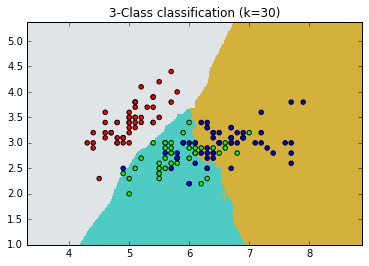

In [19]:
#on va représenter les résultats sur une grille (mesh)
#et représenter toutes les valeurs prédites
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

#on prédit pour tous les points de la grille
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#création des couleurs
cmap_light = ListedColormap(['#DFE5E6', '#4ECCC3', '#D3B13B'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


#on ajoute les résultats dans un color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#on représente les points de l'apprentissage
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k=30)")
          